# Análisis de componentes principales_Paso por paso

* Normalizar el dataset constituido por m features (columnas).
* Obtener los vectores y valores propios mediante matrices de covarianzas o de correlaciones o a través de la técnica del "singular vector decomposition".
*  Ordenar los valores propios de forma descendente para quedarnos con el p que tenga los valores mayores y disminuir el número de variables del dataset (p<m).
* Contruir la matriz de proyeccion W con los vectores p.
* Transformar el dataset original X mediante la matriz W en el subespacio dimensional con dimensiones p.

In [1]:
import pandas as pd
data_iris = pd.read_csv(r'C:\Users\pilar\OneDrive\Documentos\python-ml-course\datasets\iris\iris.csv')
data_iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### PASO 1: Normalización de los datos

In [2]:
# Normalizar los datos, pero es necesario separar el dataset entre las features y las categorías (no pueden ser normalizadas).
X = data_iris.iloc[:,0:4]
Y = data_iris.iloc[:,-1]

In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Análisis de componentes principales por la librería sklearn. PASOS 2 y 3

In [4]:
from sklearn.decomposition import PCA

In [41]:
model_pca = PCA().fit(X_std)

In [42]:
model_pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199],
       [-0.71956635,  0.24438178,  0.14212637,  0.63427274],
       [-0.26128628,  0.12350962,  0.80144925, -0.52359713]])

In [13]:
# Combinar el escalado de las features y el modelo PCA mediante un pipeline.
from sklearn.pipeline import make_pipeline
pca_pip = make_pipeline(StandardScaler(), PCA()).fit(X)

# Extraer el modelo PCA.
pca_model = pca_pip.named_steps['pca']

In [14]:
# Obtener los vectores propios que proporcionan la dirección que contiene el valor de los loadings  ϕ  para la maximización de la varianza.
df_results = pd.DataFrame(
    data = model_pca.components_,
    columns = data_iris.columns[0:4],
    index = ['PCA1', 'PCA2', 'PCA3', 'PCA4'])
   
df_results  # PCA1 sería la combinación lineal de: 0.52*Sepal_L - 0.26*Sepal_W + 0.58*Petal_L + 0.56*Petal_W. 
            # Es la matriz de proyecciones W.

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
PCA1,0.521066,-0.269347,0.580413,0.564857
PCA2,0.377418,0.923296,0.024492,0.066942
PCA3,-0.719566,0.244382,0.142126,0.634273
PCA4,-0.261286,0.123510,0.801449,-0.523597


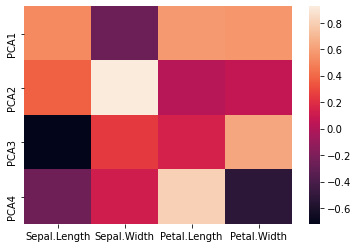

In [15]:
# Visualizar el peso que tiene cada variable con cada PCA mediante un heatmap.
import seaborn as sns

sns.heatmap(df_results)

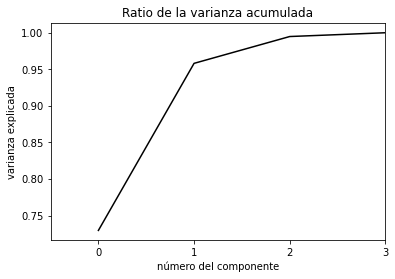

[20.92306556 11.7091661   4.69185798  1.76273239]


In [16]:
# Conocer el porcentaje del total que explican la clasificacion de las flores. 
# La técnica del codo permite visualizar la variabilidad explicada por cada una de las features.
import matplotlib.pyplot as plt
import numpy as np


plt.plot(model_pca.explained_variance_ratio_.cumsum(), c = 'black')
plt.title('Ratio de la varianza acumulada')
plt.xlabel('número del componente')
plt.xticks(np.arange(model_pca.n_components_))
plt.ylabel('varianza explicada')
plt.xlim(-0.5,3)
plt.show()                      
print(model_pca.singular_values_)

### PASO 4: Transformación del dataset original para proyectarlos en el nuevo espacio dimensional.

In [20]:
# Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones 
# proyectándolas en el espacio definido por las componentes.
finalmodel_pca = PCA(n_components = 2).fit(X_std)            # El modelo final está formado por 2 componentes

X_pca = finalmodel_pca.transform(X_std)
# La transformación es el resultado de multiplicar la matriz de proytecciones W por el valor original Xi.

final_results = pd.DataFrame(
    data = X_pca,
    columns= ['PCA1', 'PCA2'])

final_results.head()

,PCA1,PCA2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


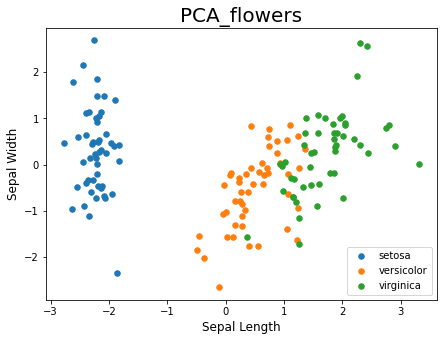

In [21]:
# Graficar las dos variables con mayor importancia porque explican la mayor variabilidad. 
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(7,5))
for name in ['setosa', 'versicolor', 'virginica']:
    plt.scatter(X_pca[Y == name, 0], X_pca[Y == name, 1], s = 30, cmap = 'winter', marker = 'o')
    plt.title('PCA_flowers', size = 20)
    plt.xlabel('Sepal Length', size = 12)
    plt.ylabel('Sepal Width', size = 12)

plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

# Ánalisis de componentes principales por la libreria numpy.

### PASO 2a: Obtener vectores y valores propios por el método de la matriz covarianza

In [22]:
# Calcular la matriz de covarianzas para determinar la variabilidad que hay entre 2 variables elegidas aleatoriamente y respecto a su media.
import numpy as np
vector_mean = np.mean(X_std, axis= 0)
matrix_cov = (X_std - vector_mean).T.dot(X_std - vector_mean)/ (X_std.shape[0] - 1)

In [23]:
# Otro método más rápido de obtener la matriz de covarianza.
matrix_cov = np.cov(X_std.T)
matrix_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [24]:
# Descomponer los valores y vectores propios.
eig_valors, eig_vectors = np.linalg.eig(matrix_cov)
print(eig_valors, eig_vectors)

[2.93808505 0.9201649  0.14774182 0.02085386] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### PASO 2b: Obtener los vectores y los valores propios por el método de la matriz de correlaciones

In [25]:
# Usando la matriz de correlaciones.
matrix_corr = np.corrcoef(X_std.T)
matrix_corr

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [26]:
# Descomponer de la misma manera los vectores y valores propios.
eig_valors_corr, eig_vectors_corr = np.linalg.eig(matrix_corr)
print(eig_valors_corr, eig_vectors_corr)

[2.91849782 0.91403047 0.14675688 0.02071484] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [27]:
# Si utilizo los valores sin normalizar se obtiene la misma matriz de correlaciones, ya que este método lleva incluida la normalización.
matrix_corr_not_normalz = np.corrcoef(X.T)
matrix_corr_not_normalz

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [28]:
# Se obtienen los valores y los vectores descompuestos exactamente iguales.
eig_valors_corr_n, eig_vectors_corr_n = np.linalg.eig(matrix_corr_not_normalz)
print(eig_valors_corr_n, eig_vectors_corr_n)

[2.91849782 0.91403047 0.14675688 0.02071484] [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### PASO 2c: Obtener los vectores y los valores propios por el método 'singular value decomposition'

In [29]:
# Éste es un método con un mayor rendimiento computacional.
u, s, v = np.linalg.svd(X_std.T)

In [30]:
# El valor u correspondería a los vectores propios
print(u,s)

[[-0.52106591 -0.37741762  0.71956635  0.26128628]
 [ 0.26934744 -0.92329566 -0.24438178 -0.12350962]
 [-0.5804131  -0.02449161 -0.14212637 -0.80144925]
 [-0.56485654 -0.06694199 -0.63427274  0.52359713]] [20.92306556 11.7091661   4.69185798  1.76273239]


### PASO 3a: Comprobar la longitud de los vectores.

In [31]:
for eig in eig_vectors:
    print(np.linalg.norm(eig))

1.0
1.0
1.0
0.9999999999999997


### PASO 3b: Agrupar los valores propios con los vectores.

In [34]:
eig_pars = [(np.abs(eig_valors[i]), eig_vectors[:,i]) for i in range (len(eig_valors))]

### PASO 3c: Ordenar los valores propios  junto con los vectores de forma descendente.

In [35]:
eig_pars_sorted = sorted(eig_pars, reverse = True)
eig_pars_sorted

[(2.9380850501999953,
  array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])),
 (0.920164904162487,
  array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])),
 (0.14774182104494807,
  array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])),
 (0.020853862176462408,
  array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]

In [36]:
# Únicamente quedarse con los valores propios.
print('Los valores propios ordenados de mayor a menor peso son:')
for eig in eig_pars_sorted:
    print(eig[0])

Los valores propios ordenados de mayor a menor peso son:
2.9380850501999953
0.920164904162487
0.14774182104494807
0.020853862176462408


### PASO 3d: Obtener el ratio de la varianza explicada.

In [37]:
# Obtener la suma de todos los valores propios.
valors_total = sum(eig_valors)

In [38]:
# Obtener el ratio de la varianza explicada por cada variable feature. Éste se puede representar por un gráfico de codo.
print('El ratio de la varianza explicada es:')
for eig in eig_pars_sorted:
    print(eig[0]/valors_total)

El ratio de la varianza explicada es:
0.7296244541329988
0.22850761786701757
0.036689218892828765
0.005178709107154831


In [39]:
# Se puede obtener los porcentaje de la varianza explicada ordenados ascendentemente.
var_exp = [((eig[0]/valors_total) *100) for eig in eig_pars_sorted]
var_exp

[72.96244541329987, 22.850761786701757, 3.6689218892828763, 0.5178709107154831]

In [40]:
# A partir de aqui representar los datos únicamente bidimensional (x, y), ya que hemos visto que con las dos primeras variables
# del vector features explica el 96 % de la variabilidad de los datos.